# 『ウェブ最適化ではじめる機械学習』の写経

In [1]:
import os
import sys

sys.path.append(os.path.join('../.venv/Lib/site-packages/'))

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

## Chap. 3 combinational test

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 9 seconds.


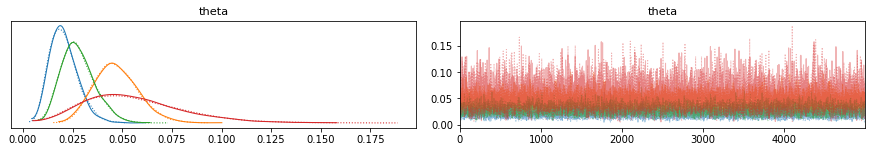

In [3]:
n = [434, 382, 394, 88]
clicks = [8,17, 10, 4]
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1, shape=len(n))
    obs = pm.Binomial('obs', p=theta, n=n, observed=clicks)
    trace = pm.sample(5000, chains=2)
    pm.traceplot(trace, compact=True)

In [4]:
with model:
    print(pm.summary(trace, hdi_prob=0.95))

           mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_mean  \
theta[0]  0.021  0.007     0.008      0.034        0.0      0.0   12187.0   
theta[1]  0.047  0.011     0.027      0.069        0.0      0.0   14733.0   
theta[2]  0.028  0.008     0.013      0.045        0.0      0.0   12085.0   
theta[3]  0.056  0.024     0.015      0.105        0.0      0.0   13155.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
theta[0]  10899.0   12073.0    7047.0    1.0  
theta[1]  13623.0   14687.0    7244.0    1.0  
theta[2]  10669.0   12231.0    6700.0    1.0  
theta[3]  10905.0   13101.0    7108.0    1.0  


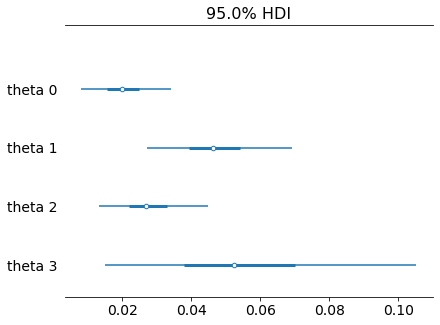

In [5]:
with model:
    pm.forestplot(trace, combined=True, hdi_prob=0.95)

In [6]:
# 線形モデルに変更
img = [0,0,1,1]
btn = [0,1,0,1]

with pm.Model() as model_comb:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    comb = alpha + beta[0] * img + beta[1] * btn
    theta = pm.Deterministic('theta', 1/(1+pm.math.exp(-comb)))
    obs = pm.Binomial('obs', p=theta, n=n, observed=clicks)
    trace_comb= pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 10 seconds.


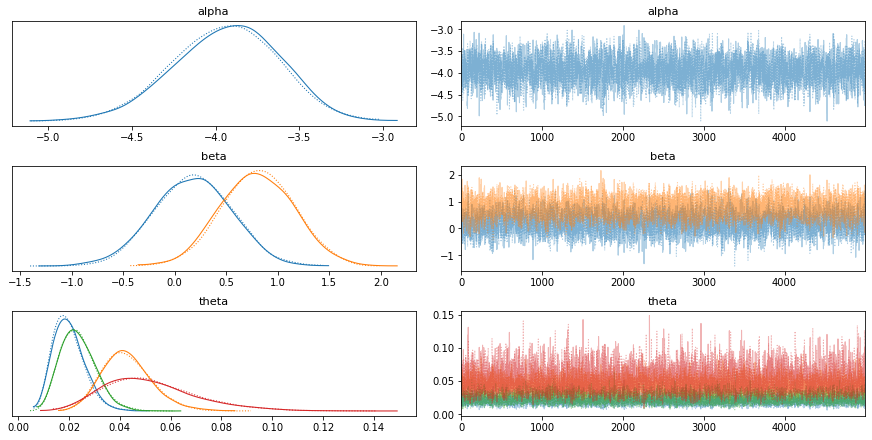

In [7]:
with model_comb:
    pm.traceplot(trace_comb)

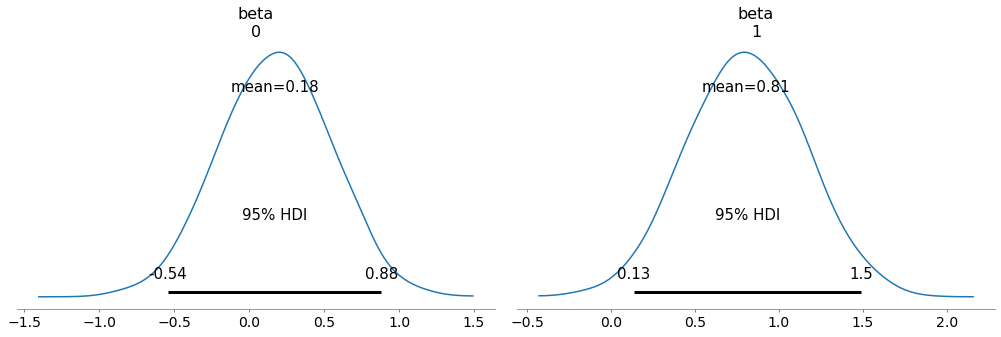

In [8]:
with model_comb:
    pm.plot_posterior(trace_comb, var_names=['beta'], hdi_prob=0.95)

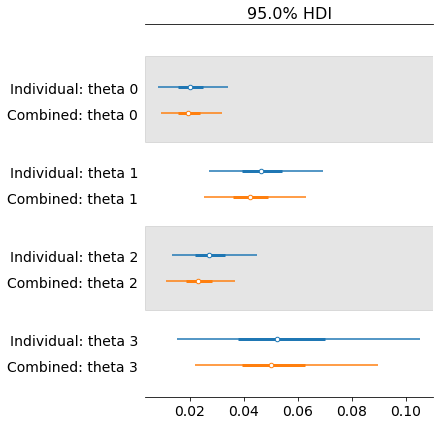

In [9]:
with pm.Model():
    pm.forestplot([trace, trace_comb], var_names=['theta'],
                 hdi_prob=0.95, combined=True,
                 model_names=['Individual', 'Combined'])